In [ ]:
# Jupyter Notebook to illustrate the use of only basic Python functionality to solve Simple Linear Regression problem
# We will primarily use lists and we will NOT import any Python packages in this unit !!

# The steps:
#   Define a function to create two lists y, x 
#       by reading their values from a .csv file : 'linear-data-set-for-regression.csv'
#   Define functions to calculate : x_squared_bar, xy_bar, xbar, ybar 
#   and use these functions to calculate regression coefficients a and b 
#   calculate the predicted values ycap = a * x + b
#   calculate the residuals e = y - ycap
#   Calculate SSE and MSE

# To emphasize once again, we will not import any of the external Python libraries or packages in this unit

In [ ]:
# We will begin by defining a function to read the y,x data from a text file
#   Input: 
#       filename: name of the file
#   Output:
#       yi, xi: two lists

def read_xy_from_file(filename):
    yi, xi = [], [] # Create two empty lists, to be filled in later in the function

    with open("linear-data-set-for-regression.csv", "r") as file:
        a_line = file.readline() # read the first line, and ignore it. It is the the header - y, x
        a_line = file.readline() # read the second line and then enter a 'while' loop

        while a_line:           # So long as a line has been successfully read ...
            yt, xt = a_line.strip().split(",")  # strip the line of leading and trailing spaces, if any, and split on the comma
            yi.append(float(yt))                # convert the string to a float and add it to the y list
            xi.append(float(xt))                # convert the string to a float and add it to the x list
            a_line = file.readline()            # read the next line, and re-enter the loop at the top

    # When control comes here, it means that 'a_line' is empty, there was nothing more to read from the file
    return yi, xi

In [ ]:
# Use the function defined above to read the data from the file
# Note: Ensure that the data file is in the same directory as this Notebook
y, x = read_xy_from_file("linear-data-set-for-regression.csv")
print(f"Successfully read {len(y)} records from the file")

Now define the functions required to calculate the regression coefficients a and b
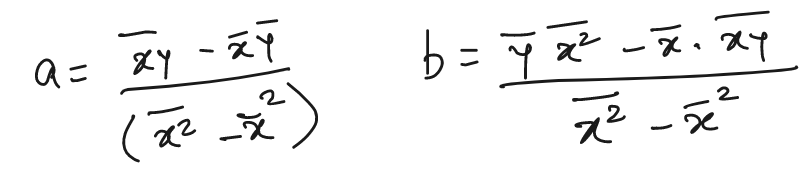

In [ ]:
def xybar(yi, xi):
    count = 0
    prod_xy = 0
    for i in range(len(yi)):
        prod_xy += yi[i] * xi[i]
        count += 1
    
    return prod_xy / count
    
def avg(lst):   # This function calculates the average of a list. Will be used for xbar and ybar
    total = sum(lst)
    count = len(lst)

    if count == 0:
        return 0

    mean = total / count
    return mean

def avg_of_square(lst):
    if len(lst) == 0:
        return 0

    square_sum = sum(x ** 2 for x in lst)
    count = len(lst)
    average = square_sum / count

    return average


In [ ]:
a = (xybar(y, x) - avg(x) * avg(y)) / (avg_of_square(x) - avg(x) ** 2)
b = (avg(y) * avg_of_square(x) - avg(x) * xybar(y, x)) / (avg_of_square(x) - avg(x) ** 2)
print(f"Coefficients: a = {a}, b = {b}")

In [ ]:
# Function to calculate the predicted values ycap = a * x + b
def calc_ycap(x, a, b):
    y_cap = [a * xi + b for xi in x]
    return y_cap

In [ ]:
# Use the function defined above to calculate the predicted values ycap
# ... and also the prediction errors

ycap = calc_ycap(x, a, b)    # Predicted values, based on the regression line
e = [y[i] - ycap[i] for i in range(len(y))] # Prediction errors (note the use of the 'range' function)

In [ ]:
# Print out a few values of both, for comparison with the values calculated using excel
print(f"Predicted y values: {ycap[0:5]} ...")
print(f"Prediction errors: {e[0:5]} ...")

In [ ]:
# Calculate SSE
SSE = sum([e[i] ** 2 for i in range(len(e))])
MSE = SSE / len(e)                  # MSE = SSE / N ... (not the same as the F-test MSE calculation, where df is used)
print(f"SSE: {SSE}, MSE: {MSE}")

In [ ]:
# That's it !!
# Compare all the above values with the values calculated using excel
# In subsequent units, we will use Python packages to get all this done in fewer lines of code